# **ELIXIR Spatial Transcriptomics Course**

Author: George Gavriilidis

Date: 2025-02-21

Author email: ggeorav@certh.gr

# Practical 0: Data Formats

### Quiz: Pre-Workshop Check

1. What is a `SpatialData` object?  

2. Which file formats are commonly used for spatial transcriptomics?  

3. What are the main advantages of using `SpatialData` objects over plain tables or data frames?

4. Can you reflect on the similarities and differences among Visium, Visium HD, MERFISH and Xenium data structures via the `SpatialData` framework?
 

# Introduction to `SpatialData` objects

⚠️ Adjust the variable below to the data path on your specific workstation.

### Hands-On Exercise:
Run the cell below and explore the files available in the `data/` directory. What do you notice about the file types?
```python
!ls data/
```


In [ ]:
# !ls data/

In [7]:
# mkdir "data/"

In [1]:
data_path = "./data/"

In [2]:
import spatialdata as sd

/Users/georgegavriilidis/spatialdata_env/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [3]:
from spatialdata_io import visium, visium_hd, xenium

## Reading common raw data formats

The `spatialdata-io` library allows for reading common raw data formats.
Here we show an example where 3 very different technologies from 10x Genomics are read into a general data structure, given by the [`SpatialData` class](https://spatialdata.scverse.org/en/latest/generated/spatialdata.SpatialData.html#spatialdata.SpatialData).  These are the elements that can be contained inside of a `SpatialData` object:

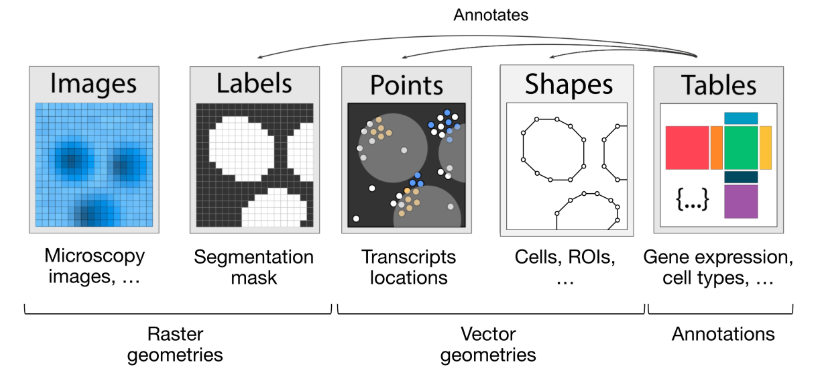

# Visium

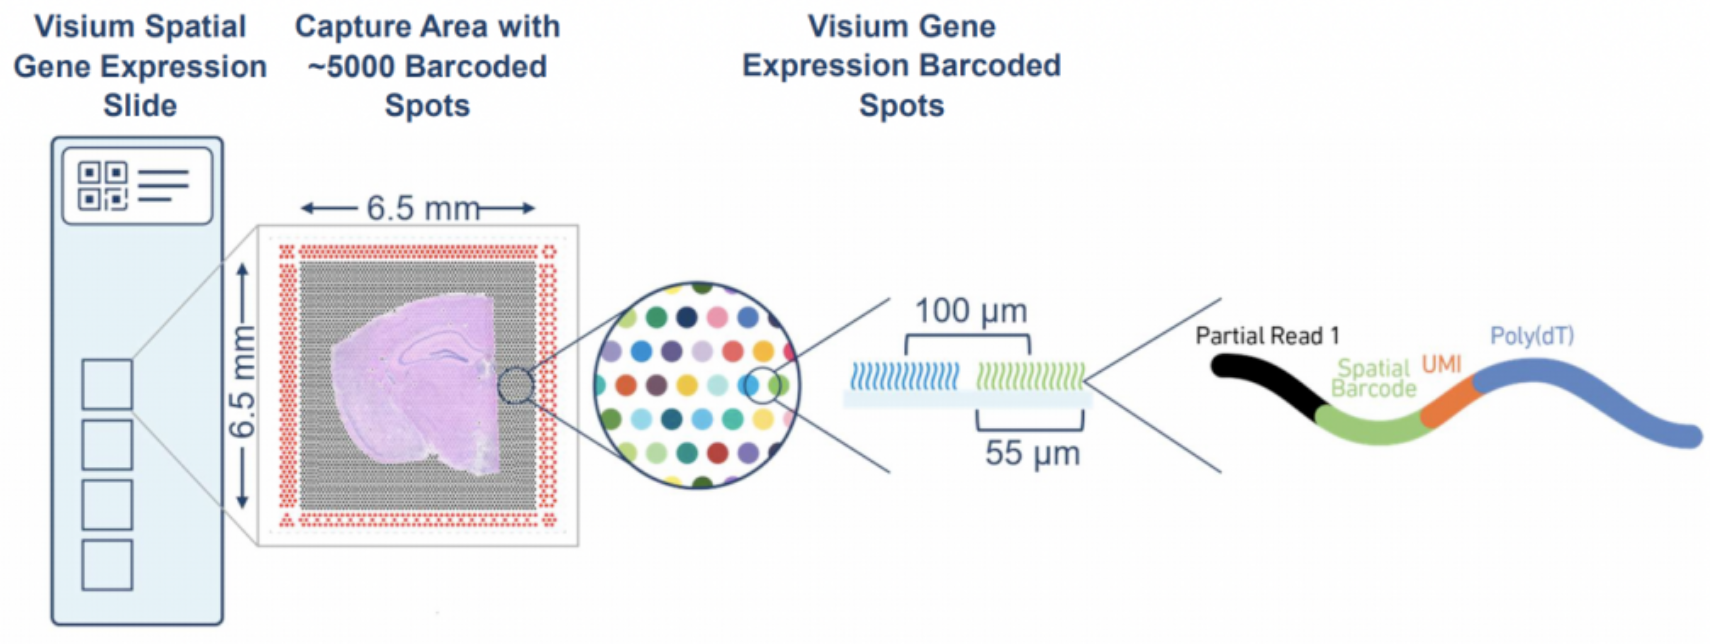

The Visium technology works by detecting transcripts in specific circular caption locations (often referred to as "Visium spots") on a slide. The circular capture locations are defined by the Shapes slot, which contains their coordinates. The Tables slot contains the actual transcript counts for each capture location. We can use the `render_shapes` function to overlay these circular locations onto our image.

Before any discussion on file structure, let's see how we can download any dataset of interest from 10x (this can be used as a recipe for loading any similar dataset:

In [8]:
import os

# Define the folder path you want to create
folder_path = "./data/visium_2.1.0_2_io_subset/"

# Create the folder path
try:
    os.makedirs(folder_path, exist_ok=True)
    print(f"Folder path '{folder_path}' created successfully.")
except Exception as e:
    print(f"An error occurred while creating the folder path: {e}")

Folder path './data/visium_2.1.0_2_io_subset/' created successfully.


In [9]:
# This is a way to download any dataset you like from 10x!
!wget -O ./data/visium_2.1.0_2_io_subset/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_filtered_feature_bc_matrix.h5 "https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_filtered_feature_bc_matrix.h5"
!wget -O ./data/visium_2.1.0_2_io_subset/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_spatial.tar.gz "https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_spatial.tar.gz"

--2025-01-19 11:09:32--  https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43801595 (42M) [binary/octet-stream]
Saving to: ‘./data/visium_2.1.0_2_io_subset/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_filtered_feature_bc_matrix.h5’

./data/visium_2.1.0 100%[===================>]  41,77M   992KB/s    in 22s     

2025-01-19 11:09:56 (1,86 MB/s) - ‘./data/visium_2.1.0_2_io_subset/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_filtered_feature_bc_matrix.h5’ saved [43801595/43801595]

--2025-01-19 11:09:56--  https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma/CytAssist

In [10]:
import tarfile
import os

# Define the file paths
tar_file_path = "./data/visium_2.1.0_2_io_subset/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_spatial.tar.gz"
extract_path = "./data/visium_2.1.0_2_io_subset/"

# Extract the tar.gz file
try:
    with tarfile.open(tar_file_path, "r:gz") as tar:
        tar.extractall(path=extract_path)
    print(f"Extracted files to: {extract_path}")
    print("Contents:", os.listdir(extract_path))
except Exception as e:
    print(f"An error occurred while extracting the file: {e}")

Extracted files to: ./data/visium_2.1.0_2_io_subset/
Contents: ['CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_filtered_feature_bc_matrix.h5', 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_spatial.tar.gz', 'spatial']


### Quiz: Understanding data format
1. What data components enable the assembly of spatial_visium objects?

Can you guess the component that belongs to each description? Run the code chunks below.

<div style="border: 1px solid #ffa6a6; padding: 10px; border-radius: 5px;">
<span style="color: #ff6666; font-size: 20px;"><b>Quiz:</b></span> <span style="font-size: 20px;">Understanding Data Format</span>  
<ul>
    <li>What data components enable the assembly of <b>spatial_visium</b> objects?</li>
    <li>Can you guess the component that belongs to each description?</li>
</ul>
<p>Run the code chunks below to explore:</p>
<ol>
    <li>Which file provides the spatial coordinates of transcriptomics spots?</li>
    <li>What component contains the scaled low-resolution tissue image?</li>
    <li>How are barcodes mapped to their physical positions on the tissue?</li>
</ol>
</div>

This component contains markers used to align the spatial tissue image with the slide. 
These are essential for accurately mapping tissue spots to their physical locations.

In [3]:
from IPython.display import display, HTML

# Define the reflection question with green styling
reflection_question = """
<div style="border: 1px solid #90ee90; padding: 10px; border-radius: 5px;">
<span style="color: #32cd32; font-size: 16px;"><b>This component contains markers used to align the spatial tissue image with the slide. 
These are essential for accurately mapping tissue spots to their physical locations</b></span>
</div>
"""

# Define the hidden answer with collapsible content
hidden_answer = """
<details>
<summary>Click to reveal answer</summary>
<p>
aligned_fiducials
</p>
</details>
"""

# Display the reflection question with hidden answer
display(HTML(reflection_question + hidden_answer))

In [5]:
from IPython.display import display, HTML

# Define the reflection question with green styling
reflection_question = """
<div style="border: 1px solid #90ee90; padding: 10px; border-radius: 5px;">
<span style="color: #32cd32; font-size: 16px;"><b>This component represents the aligned image of the tissue, 
processed to ensure correct orientation and registration with the spatial transcriptomics spots on the slide.</b></span>
</div>
"""

# Define the hidden answer with collapsible content
hidden_answer = """
<details>
<summary>Click to reveal answer</summary>
<p>
aligned_tissue_image.jpg
</p>
</details>
"""

# Display the reflection question with hidden answer
display(HTML(reflection_question + hidden_answer))

In [6]:
from IPython.display import display, HTML

# Define the reflection question with green styling
reflection_question = """
<div style="border: 1px solid #90ee90; padding: 10px; border-radius: 5px;">
<span style="color: #32cd32; font-size: 16px;"><b>This component provides scaling factors that map between the high-resolution tissue image 
and the low-resolution spot layout. It's crucial for visualizing and analyzing spatial data accurately.</b></span>
</div>
"""

# Define the hidden answer with collapsible content
hidden_answer = """
<details>
<summary>Click to reveal answer</summary>
<p>
scalefactors_json.json
</p>
</details>
"""

# Display the reflection question with hidden answer
display(HTML(reflection_question + hidden_answer))

In [7]:
from IPython.display import display, HTML

# Define the reflection question with green styling
reflection_question = """
<div style="border: 1px solid #90ee90; padding: 10px; border-radius: 5px;">
<span style="color: #32cd32; font-size: 16px;"><b>This component is a lower-resolution version of the tissue image, 
often used for overlaying spot data due to its faster processing.</b></span>
</div>
"""

# Define the hidden answer with collapsible content
hidden_answer = """
<details>
<summary>Click to reveal answer</summary>
<p>
tissue_lowres_image.png
</p>
</details>
"""

# Display the reflection question with hidden answer
display(HTML(reflection_question + hidden_answer))

In [8]:
from IPython.display import display, HTML

# Define the reflection question with green styling
reflection_question = """
<div style="border: 1px solid #90ee90; padding: 10px; border-radius: 5px;">
<span style="color: #32cd32; font-size: 16px;"><b>This component contains the coordinates of the spatial transcriptomics spots 
relative to the tissue image. It maps barcodes to their physical positions on the tissue, enabling spatial analysis.</b></span>
</div>
"""

# Define the hidden answer with collapsible content
hidden_answer = """
<details>
<summary>Click to reveal answer</summary>
<p>
tissue_positions.csv
</p>
</details>
"""

# Display the reflection question with hidden answer
display(HTML(reflection_question + hidden_answer))

#### Inspecting Visium data structure

In [4]:
sdata_visium = visium(data_path + "visium_2.1.0_2_io_subset")

INFO     reading                                                                                                   
         data/visium_2.1.0_2_io_subset/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_filtered_feature_bc_mat
         rix.h5                                                                                                    


/Users/georgegavriilidis/spatialdata_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/georgegavriilidis/spatialdata_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/georgegavriilidis/spatialdata_env/lib/python3.9/site-packages/spatialdata/models/models.py:1035: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)


The warning above indicates that the variable names (in this case, genes) in the provided data are not unique. It is essential that the variable names are unique to ensure the accuracy of several analysis steps, so we'll use the `AnnData` API to make sure of that.

In [12]:
sdata_visium.tables["table"].var_names_make_unique()  # modifies in-place

Let's have a look at the `SpatialData` object we just created:

In [13]:
sdata_visium

SpatialData object
├── Images
│     ├── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image': DataArray[cyx] (3, 2000, 1744)
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image': DataArray[cyx] (3, 600, 523)
├── Shapes
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma': GeoDataFrame shape: (5756, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (5756, 18085)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)
    ▸ 'downscaled_lowres', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)
    ▸ 'global', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)

In [21]:
sdata_visium["table"]

AnnData object with n_obs × n_vars = 5756 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'spatialdata_attrs'
    obsm: 'spatial'

We use the following classes for storing the elements:

* single-scale images and labels elements are represented as xarray.DataArray
objects.
* shapes elements are represented as geopandas.GeoDataFrame objects.
* tables elements are represented as anndata.AnnData objects.

This is a low-resolution tissue image represented as an xarray.DataArray, with labeled dimensions (RGB channels, height, and width) and metadata for spatial alignment. This structure is crucial for integrating the image with spatial transcriptomics data and performing visual or computational analyses on tissue sections.

# Visium HD

Visium HD is a next-generation spatial transcriptomics platform offering single-cell-scale resolution of whole transcriptome gene expression. With advanced slide architecture and a CytAssist-enabled workflow, it provides high-resolution spatial insights into tissue organization and cellular interactions. Applications include identifying rare cell types, such as IgA plasma cells in human trachea, and discovering biomarkers like B-cell activity in liver tumors during clinical trials.

The platform’s 2 µm x 2 µm barcoded oligonucleotide squares enable precise spatial mapping of gene expression, with customizable binning options for various resolutions. Tissue sections, including archived FFPE samples, undergo H&E or IF staining, followed by transcriptome-wide probe capture and spatial barcoding. These captured probes are processed into gene expression libraries for sequencing and visualization.

Visium HD empowers researchers to uncover tissue organization, identify disease biomarkers, and generate actionable insights for immunology and oncology. Its high-resolution data represents a leap forward in spatial biology, enabling discoveries that were previously unattainable.

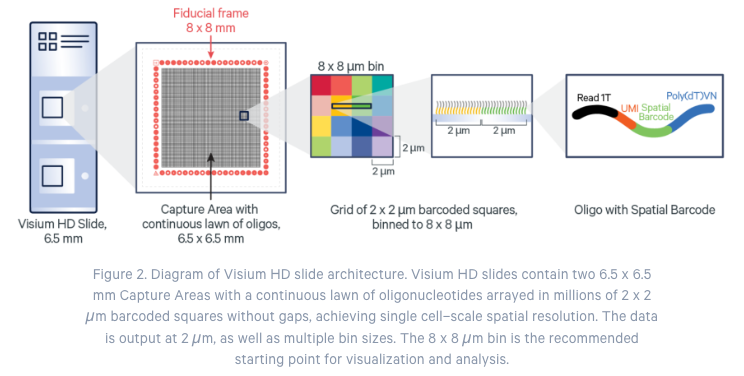

This technology is somewhat similar to the regular Visium technology, but the spatial expression is no longer based on an hexagonal grid but instead on probes, arranged into a square grid, which can be aggregated into different resolutions. This allows the data to have sub-cellular precision. More details can be found in the publication.

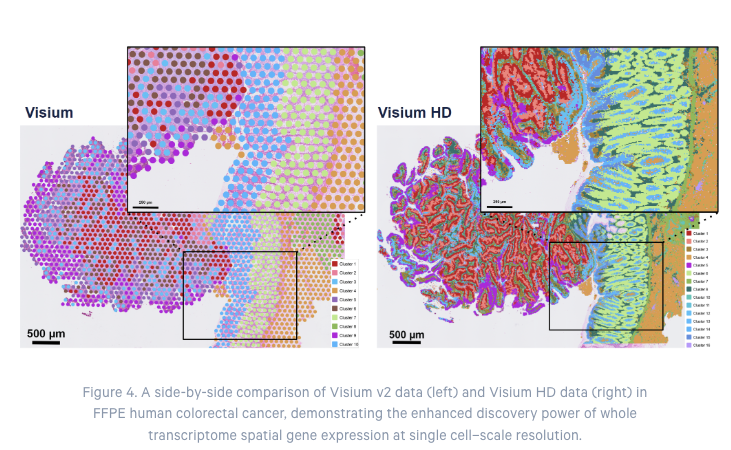

In [25]:
# import os

# # Define the folder path you want to create
# folder_path = "./data/visium_hd_3.0.0_io_subset/"

# # Create the folder path
# try:
#     os.makedirs(folder_path, exist_ok=True)
#     print(f"Folder path '{folder_path}' created successfully.")
# except Exception as e:
#     print(f"An error occurred while creating the folder path: {e}")

Folder path './data/visium_hd_3.0.0_io_subset/' created successfully.


In [ ]:
# !wget -O ./data/visium_hd_3.0.0_io_subset/Visium_HD_Mouse_Small_Intestine_feature_slice.h5 https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Mouse_Small_Intestine/Visium_HD_Mouse_Small_Intestine_feature_slice.h5

# !wget -O ./data/visium_hd_3.0.0_io_subset/Visium_HD_Mouse_Small_Intestine_molecule_info.h5 https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Mouse_Small_Intestine/Visium_HD_Mouse_Small_Intestine_molecule_info.h5

# !wget -O ./data/visium_hd_3.0.0_io_subset/Visium_HD_Mouse_Small_Intestine_spatial.tar.gz https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Mouse_Small_Intestine/Visium_HD_Mouse_Small_Intestine_spatial.tar.gz


In [ ]:
# !wget -O ./data/visium_hd_3.0.0_io_subset/Visium_HD_Mouse_Small_Intestine_binned_outputs.tar.gz https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Mouse_Small_Intestine/Visium_HD_Mouse_Small_Intestine_binned_outputs.tar.gz

In [ ]:
# # Unzip spatial folder
# import tarfile
# import os

# # Define the file paths
# tar_file_path = "./data/visium_hd_3.0.0_io_subset/Visium_HD_Mouse_Small_Intestine_spatial.tar.gz"
# extract_path = "./data/visium_hd_3.0.0_io_subset/"

# # Extract the tar.gz file
# try:
#     with tarfile.open(tar_file_path, "r:gz") as tar:
#         tar.extractall(path=extract_path)
#     print(f"Extracted files to: {extract_path}")
#     print("Contents:", os.listdir(extract_path))
# except Exception as e:
#     print(f"An error occurred while extracting the file: {e}")

In [ ]:
# # Unzip binned outputs
# import tarfile
# import os

# # Define the file paths
# tar_file_path = "./data/visium_hd_3.0.0_io_subset/Visium_HD_Mouse_Small_Intestine_binned_outputs.tar.gz"
# extract_path = "./data/visium_hd_3.0.0_io_subset/"

# # Extract the tar.gz file
# try:
#     with tarfile.open(tar_file_path, "r:gz") as tar:
#         tar.extractall(path=extract_path)
#     print(f"Extracted files to: {extract_path}")
#     print("Contents:", os.listdir(extract_path))
# except Exception as e:
#     print(f"An error occurred while extracting the file: {e}")

* Dataset Structure: The Visium HD dataset includes high-resolution (hires_image) and low-resolution (lowres_image) tissue images, as well as shapes at varying spatial resolutions (square_002um, square_008um, square_016um) to accommodate ultra-high-density data.

* Coordinate Systems: Multiple coordinate systems (downscaled_hires, downscaled_lowres, global) align the spatial data with tissue images, enabling precise mapping and cross-resolution analysis.

* Binned Spatial Resolutions: Shapes at different resolutions (e.g., square_002um for fine-grained analysis and square_016um for aggregated data) provide flexibility in balancing spatial resolution and computational efficiency.

Similarly, to the regular Visium data, we can read and inspect the individual modalities contained in the data. We can see that the Visium HD data contains a lot more elements in the Shapes slot (351817 vs 5756) due to the increased precision.

In [5]:
sdata_visium_hd = visium_hd("./data/visium_hd_3.0.0_io_subset")

sdata_visium_hd

/Users/georgegavriilidis/spatialdata_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/georgegavriilidis/spatialdata_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/georgegavriilidis/spatialdata_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/var/folders/hr/f3msc_bs3z53n3_m4c4ry6tc0000gn/T/ipykernel_5351/2805627724.py:1: UserWarning: No full resolution image found. If incorrect, please specify the path in the `fullres_image_file` parameter when calling the `visium_hd` reader function.
  sdata_visium_hd = visium_hd("./data/visium_hd_3.0.0

SpatialData object
├── Images
│     ├── 'Visium_HD_Mouse_Small_Intestine_hires_image': DataArray[cyx] (3, 5575, 6000)
│     └── 'Visium_HD_Mouse_Small_Intestine_lowres_image': DataArray[cyx] (3, 558, 600)
├── Shapes
│     ├── 'Visium_HD_Mouse_Small_Intestine_square_002um': GeoDataFrame shape: (5479660, 1) (2D shapes)
│     ├── 'Visium_HD_Mouse_Small_Intestine_square_008um': GeoDataFrame shape: (351817, 1) (2D shapes)
│     └── 'Visium_HD_Mouse_Small_Intestine_square_016um': GeoDataFrame shape: (91033, 1) (2D shapes)
└── Tables
      ├── 'square_002um': AnnData (5479660, 19059)
      ├── 'square_008um': AnnData (351817, 19059)
      └── 'square_016um': AnnData (91033, 19059)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        Visium_HD_Mouse_Small_Intestine_hires_image (Images), Visium_HD_Mouse_Small_Intestine_square_002um (Shapes), Visium_HD_Mouse_Small_Intestine_square_008um (Shapes), Visium_HD_Mouse_Small_Intestine_square_016um (Shapes)
    ▸ 'downscaled_lowres'

We are making unique all tables for all resolutions

In [ ]:
for table_name, adata in sdata_visium_hd_crop.tables.items():
    print(f"Processing table: {table_name}")
    adata.var_names_make_unique()

In [ ]:
for table_name, adata in sdata_visium_hd_crop.tables.items():
    duplicates = adata.var.index[adata.var.index.duplicated()]
    if duplicates.empty:
        print(f"All variable names are unique in {table_name}.")
    else:
        print(f"Duplicate variable names still exist in {table_name}: {duplicates}")

# Deep dive in `spatialdata` data architecture

The `spatialdata` library does not introduce specific types for storing the elements, and rather adopts standard classes from the imaging and geospatial Python community.

We use the following classes for storing the elements:
- single-scale images and labels elements are represented as [`xarray.DataArray`](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html) objects.
- multi-scale images and labels elements are represented as [`datatree.DataTree`](https://xarray-datatree.readthedocs.io/en/latest/quick-overview.html#datatrees) objects.
- shapes elements are represented as [`geopandas.GeoDataFrame`](https://geopandas.org/en/stable/docs/user_guide/data_structures.html) objects.
- points elements are represented as a lazy version of a [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) object; i.e. as [`dask.DataFrame`](https://docs.dask.org/en/stable/dataframe.html) objects.
- tables elements are represented as [`anndata.AnnData`](https://anndata.readthedocs.io/en/latest/) objects.

In particular:
- 2D/3D (cyx/czyx) multi-channel single-scale/multi-scale *images* (e.g. large H&E images)
- 2D/3D (yx/zyx) single-scale/multi-scale *labels* (e.g. segmentation masks)
- 2D/3D (xy/xyz) *points* (e.g. transcripts locations with gene id information)
- 2D (xy) *shapes* (e.g. cell/nucleus boundaries, anatomical annotatoins)
- *tables* (sparse/dense matrices/dataframes annotating the data).

We will give a quick overview of these classes here below; please refer to the respective documentations for a deeper introduction.

In the following examples *we will not manipulate or plot the elements using `spatialdata` code; we will just use standard `geospatial` libraries. This is to exemplify and remark how the data types we use are interoperable. Later we will show how `spatialdata` adds a layer of convenience on top of the existing geospatial ecosystem, by providing APIs that are implemented under the hood for all the geometric types.

## The `anndata.AnnData` class (*tables*)
<img src="https://raw.githubusercontent.com/scverse/anndata/main/docs/_static/img/anndata_schema.svg" width="500" height="500">

Finally we use [`AnnData` objects](https://anndata.readthedocs.io/en/latest/) to store annotations. We introduced the jargon *tables* to denotes these objects; please keep in mind that `AnnData` objects allow for storing dataframes and sparse/dense tensors.

In [20]:
adata = sdata_visium["table"]
adata

AnnData object with n_obs × n_vars = 5756 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'spatialdata_attrs'
    obsm: 'spatial'

Let's see some examples. A gene expression matrix can be stored the `.X` slot.

In [21]:
adata.X

<5756x18085 sparse matrix of type '<class 'numpy.float32'>'
	with 38928378 stored elements in Compressed Sparse Row format>

In [22]:
adata.to_df()

SAMD11  NOC2L  KLHL17  PLEKHN1  PERM1  HES4  ISG15  AGRN  \
AACAATGGAACCACAT-1     0.0    1.0     0.0      0.0    0.0   0.0    2.0   4.0   
AACAATGTGCTCCGAG-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   1.0   
AACACCAGCCTACTCG-1     0.0    0.0     0.0      0.0    0.0   0.0    1.0   0.0   
AACACCATTCGCATAC-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   4.0   
AACACCGAATGTCTCA-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   4.0   
...                    ...    ...     ...      ...    ...   ...    ...   ...   
TGTTGGCCTGTAGCGG-1     0.0    1.0     0.0      0.0    0.0   0.0    1.0   3.0   
TGTTGGTGCGCACGAG-1     0.0    1.0     0.0      0.0    0.0   1.0   42.0   2.0   
TGTTGGTGCGCTTCGC-1     0.0    1.0     0.0      0.0    0.0   0.0    4.0   3.0   
TGTTGGTGCGGAATCA-1     0.0    0.0     0.0      0.0    0.0   2.0    3.0   4.0   
TGTTGGTGGACTCAGG-1     0.0    0.0     0.0      0.0    0.0   0.0    0.0   3.0   

                    RNF223  C1orf159  ...  MT-ND2  MT-CO2  MT-ATP6  MT-CO3  \
AACAATGGAACCACAT-1     0.0       0.0  ...    73.0   138.0    320.0   308.0   
AACAATGTGCTCCGAG-1     0.0       0.0  ...    31.0    43.0     52.0   106.0   
AACACCAGCCTACTCG-1     0.0       0.0  ...    15.0    16.0     18.0    28.0   
AACACCATTCGCATAC-1     0.0       0.0  ...    54.0   104.0    283.0   340.0   
AACACCGAATGTCTCA-1     0.0       0.0  ...   153.0   250.0    342.0   632.0   
...                    ...       ...  ...     ...     ...      ...     ...   
TGTTGGCCTGTAGCGG-1     0.0       0.0  ...    29.0    39.0    181.0   173.0   
TGTTGGTGCGCACGAG-1     0.0       1.0  ...    76.0   103.0    259.0   298.0   
TGTTGGTGCGCTTCGC-1     0.0       1.0  ...    53.0    97.0    367.0   281.0   
TGTTGGTGCGGAATCA-1     0.0       0.0  ...    12.0    39.0    172.0   102.0   
TGTTGGTGGACTCAGG-1     0.0       0.0  ...    12.0    27.0     49.0    50.0   

                    MT-ND3  MT-ND4L  MT-ND4  MT-ND5  MT-ND6  MT-CYB  
AACAATGGAACCACAT-1   266.0     63.0   429.0    38.0    14.0   233.0  
AACAATGTGCTCCGAG-1    29.0     34.0    64.0    12.0    12.0    41.0  
AACACCAGCCTACTCG-1    16.0      8.0    14.0     5.0     8.0    13.0  
AACACCATTCGCATAC-1   147.0     45.0   323.0    17.0     9.0   168.0  
AACACCGAATGTCTCA-1   236.0    183.0   395.0    71.0    14.0   273.0  
...                    ...      ...     ...     ...     ...     ...  
TGTTGGCCTGTAGCGG-1   163.0     14.0   323.0    19.0     6.0   123.0  
TGTTGGTGCGCACGAG-1   181.0     60.0   344.0    22.0     5.0   181.0  
TGTTGGTGCGCTTCGC-1   249.0     36.0   392.0    32.0    12.0   233.0  
TGTTGGTGCGGAATCA-1   148.0      8.0   246.0     8.0     8.0    63.0  
TGTTGGTGGACTCAGG-1    41.0     12.0    60.0     7.0    17.0    37.0  

[5756 rows x 18085 columns]

Information on the genes (=variables), is stored in the `.var` slot.

In [23]:
adata.var

gene_ids    feature_types  genome
SAMD11   ENSG00000187634  Gene Expression  GRCh38
NOC2L    ENSG00000188976  Gene Expression  GRCh38
KLHL17   ENSG00000187961  Gene Expression  GRCh38
PLEKHN1  ENSG00000187583  Gene Expression  GRCh38
PERM1    ENSG00000187642  Gene Expression  GRCh38
...                  ...              ...     ...
MT-ND4L  ENSG00000212907  Gene Expression  GRCh38
MT-ND4   ENSG00000198886  Gene Expression  GRCh38
MT-ND5   ENSG00000198786  Gene Expression  GRCh38
MT-ND6   ENSG00000198695  Gene Expression  GRCh38
MT-CYB   ENSG00000198727  Gene Expression  GRCh38

[18085 rows x 3 columns]

Information on the cells (=observations), is stored in the `.obs` slot.

In [24]:
adata.obs

in_tissue  array_row  array_col  spot_id  \
AACAATGGAACCACAT-1          1         54         32        0   
AACAATGTGCTCCGAG-1          1         98        158        1   
AACACCAGCCTACTCG-1          1         31         39        2   
AACACCATTCGCATAC-1          1         53        139        3   
AACACCGAATGTCTCA-1          1         34        176        4   
...                       ...        ...        ...      ...   
TGTTGGCCTGTAGCGG-1          1         40         78     5751   
TGTTGGTGCGCACGAG-1          1         24        108     5752   
TGTTGGTGCGCTTCGC-1          1         37        127     5753   
TGTTGGTGCGGAATCA-1          1         83         87     5754   
TGTTGGTGGACTCAGG-1          1         86        106     5755   

                                                               region  
AACAATGGAACCACAT-1  CytAssist_FFPE_Protein_Expression_Human_Gliobl...  
AACAATGTGCTCCGAG-1  CytAssist_FFPE_Protein_Expression_Human_Gliobl...  
AACACCAGCCTACTCG-1  CytAssist_FFPE_Protein_Expression_Human_Gliobl...  
AACACCATTCGCATAC-1  CytAssist_FFPE_Protein_Expression_Human_Gliobl...  
AACACCGAATGTCTCA-1  CytAssist_FFPE_Protein_Expression_Human_Gliobl...  
...                                                               ...  
TGTTGGCCTGTAGCGG-1  CytAssist_FFPE_Protein_Expression_Human_Gliobl...  
TGTTGGTGCGCACGAG-1  CytAssist_FFPE_Protein_Expression_Human_Gliobl...  
TGTTGGTGCGCTTCGC-1  CytAssist_FFPE_Protein_Expression_Human_Gliobl...  
TGTTGGTGCGGAATCA-1  CytAssist_FFPE_Protein_Expression_Human_Gliobl...  
TGTTGGTGGACTCAGG-1  CytAssist_FFPE_Protein_Expression_Human_Gliobl...  

[5756 rows x 5 columns]

The slot `.uns` can contain unstructured data. In particular it contains some metadata that is used to link tables to the spatial elements (e.g. cell segmentation masks) that they annotate.

In [25]:
adata.uns

OrderedDict([('spatial',
              {'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma': {'metadata': {'chemistry_description': 'Visium V5 Slide',
                 'software_version': 'spaceranger-2.1.0'}}}),
             ('spatialdata_attrs',
              {'region': 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma',
               'region_key': 'region',
               'instance_key': 'spot_id'})])

### Building blocks of `anndata.AnnData` class 

#### `scipy.sparse` Matrices
![Image Description](scipy_sparse.png)

Large datasets (e.g., single-cell or spatial datasets) are often sparse, meaning most of the matrix entries are zero. To save memory and computation time, these matrices are stored in sparse formats.

Common Formats:
`scipy.sparse` matrices:
* `csr_matrix` (Compressed Sparse Row): Efficient for row slicing.
* `csc_matrix` (Compressed Sparse Column): Efficient for column slicing.
* `coo_matrix` (Coordinate): Useful for constructing sparse matrices.

In [9]:
# dense_matrix = sparse_matrix.toarray()  # Converts to a NumPy array

#### `pandas.DataFrame`
![Image Description](pandas.png)

`.obs` and `.var`: These are stored as `pandas.DataFrame` objects to handle metadata efficiently.

Use cases include filtering, subsetting, and quick visualizations.

In [11]:
# obs_df = adata.obs  # Extract metadata for cells/spots

#### `NumPy` Arrays
![Image Description](numpy.png)

Dense data operations and algorithms that don’t support sparse matrices directly often require converting the sparse `.X` matrix to a `NumPy` array.

In [10]:
# dense_array = adata.X.toarray() if scipy.sparse.issparse(adata.X) else adata.X

#### `matplotlib.pyplot` suite
![Image Description](matplotlib.png)

Visualizes data and results from analyses, including spatial plots, embeddings, and metadata distributions.
Building Block: Often used for custom plots when Scanpy’s built-in plotting functions aren’t enough.

Examples:
* Plotting spatial gene expression overlays.
* Visualizing distributions of features in `.obs`.

#### Pillow (`PIL.Image`)
![Image Description](pillow3.jpg)

Loads and processes images (e.g., histology or spatial context PNGs) that are often associated with spatial datasets.

Building Block: Helps integrate spatial imaging data with transcriptomics data stored in `AnnData`.


Examples:
* Loading histology slides or segmentation maps.
* Visualizing spatial context alongside expression data.

#### Typical workflow adjustments

In [ ]:
# # Subsetting Data: Extract a portion of the data based on metadata or other filters
# adata_subset = adata[adata.obs["condition"] == "treated"]

In [ ]:
# Convert sparse .X to dense before using tools like PCA that require dense input.

In [ ]:
# # Convert AnnData to a DataFrame for use with general-purpose libraries
# df = pd.DataFrame(adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)

## The `xarray.DataArray` class (*images* and *labels*)

In [35]:
sdata_visium

SpatialData object
├── Images
│     ├── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image': DataArray[cyx] (3, 2000, 1744)
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image': DataArray[cyx] (3, 600, 523)
├── Shapes
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma': GeoDataFrame shape: (5756, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (5756, 18085)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)
    ▸ 'downscaled_lowres', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)
    ▸ 'global', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)

In [27]:
image_l = sdata_visium["CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image"]
image_l

<xarray.DataArray 'image' (c: 3, y: 600, x: 523)> Size: 941kB
dask.array<transpose, shape=(3, 600, 523), dtype=uint8, chunksize=(3, 600, 523), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) <U1 12B 'r' 'g' 'b'
  * y        (y) float64 5kB 0.5 1.5 2.5 3.5 4.5 ... 596.5 597.5 598.5 599.5
  * x        (x) float64 4kB 0.5 1.5 2.5 3.5 4.5 ... 519.5 520.5 521.5 522.5
Attributes:
    transform:  {'downscaled_lowres': Identity }

In [28]:
image_h = sdata_visium["CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image"]
image_h

<xarray.DataArray 'image' (c: 3, y: 600, x: 523)> Size: 941kB
dask.array<transpose, shape=(3, 600, 523), dtype=uint8, chunksize=(3, 600, 523), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) <U1 12B 'r' 'g' 'b'
  * y        (y) float64 5kB 0.5 1.5 2.5 3.5 4.5 ... 596.5 597.5 598.5 599.5
  * x        (x) float64 4kB 0.5 1.5 2.5 3.5 4.5 ... 519.5 520.5 521.5 522.5
Attributes:
    transform:  {'downscaled_lowres': Identity }

INFO     Dropping coordinate system 'global' since it doesn't have relevant elements.                              
INFO     Rasterizing image for faster rendering.                                                                   


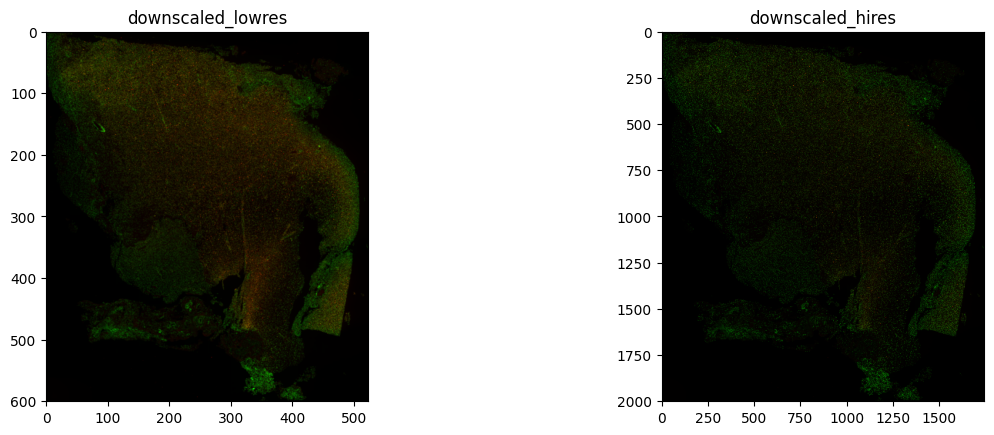

In [37]:
sdata_visium.pl.render_images().pl.show()

INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   


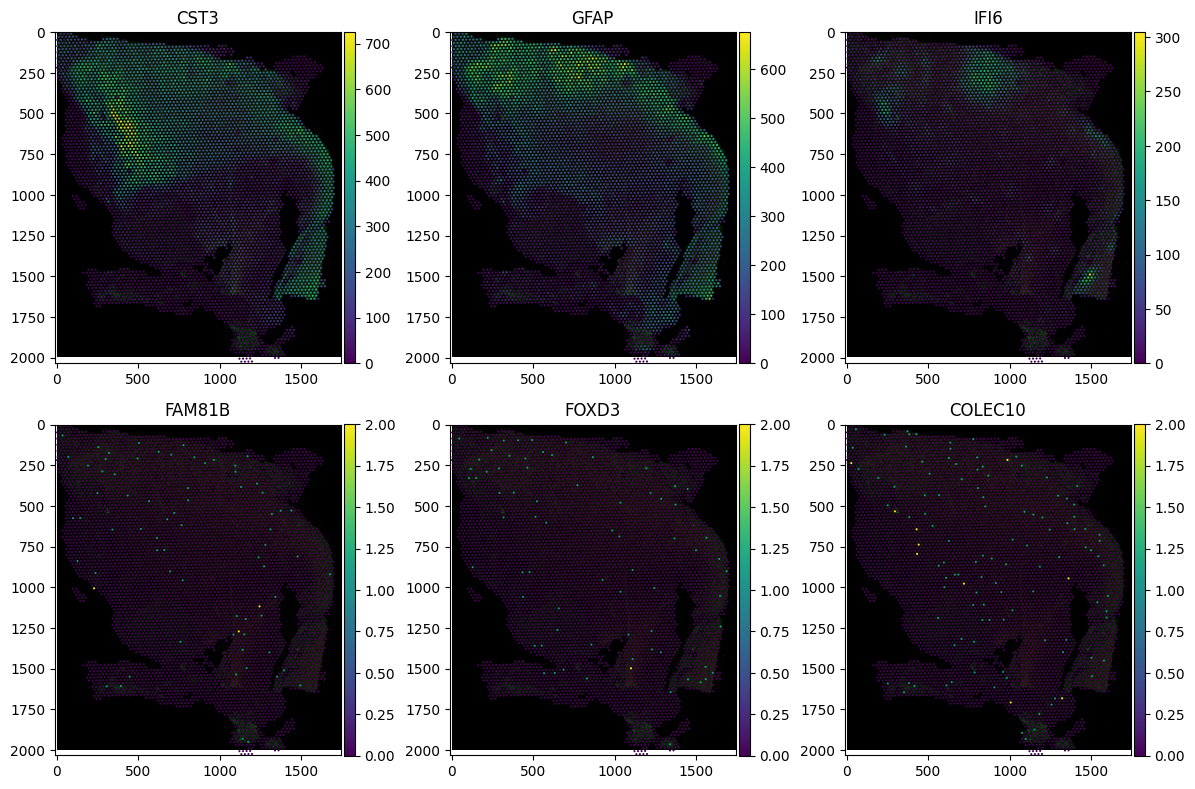

In [38]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for idx, gene in enumerate(["CST3", "GFAP", "IFI6", "FAM81B", "FOXD3", "COLEC10"]):
    (
        sdata_visium.pl.render_images()
        .pl.render_shapes(color=f"{gene}")
        .pl.show("downscaled_hires", ax=axs[idx // 3, idx % 3], title=gene)
    )

fig.tight_layout()

INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0070922].


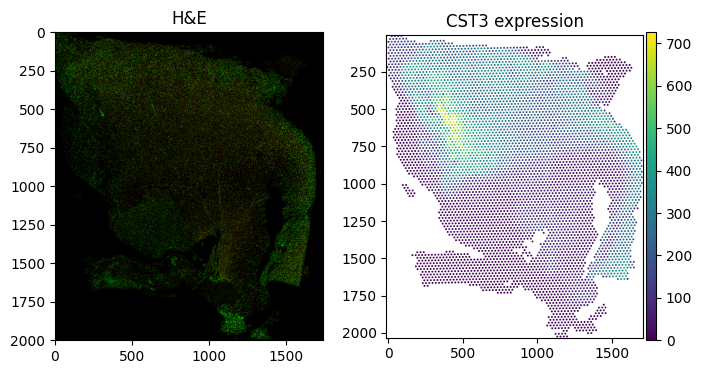

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sdata_visium.pl.render_images().pl.show("downscaled_hires", ax=axs[0], title="H&E")

sdata_visium.pl.render_shapes(color="CST3").pl.show(
    "downscaled_hires", ax=axs[1], title="CST3 expression"
)

Let's make some static visualisations of Visium HD:

In [31]:
image_l = sdata_visium_hd["Visium_HD_Mouse_Small_Intestine_hires_image"]
image_l

<xarray.DataArray 'image' (c: 3, y: 5575, x: 6000)> Size: 100MB
dask.array<transpose, shape=(3, 5575, 6000), dtype=uint8, chunksize=(3, 5575, 6000), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) <U1 12B 'r' 'g' 'b'
  * y        (y) float64 45kB 0.5 1.5 2.5 3.5 ... 5.572e+03 5.574e+03 5.574e+03
  * x        (x) float64 48kB 0.5 1.5 2.5 3.5 ... 5.998e+03 5.998e+03 6e+03
Attributes:
    transform:  {'downscaled_hires': Identity }

INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15..1.0].


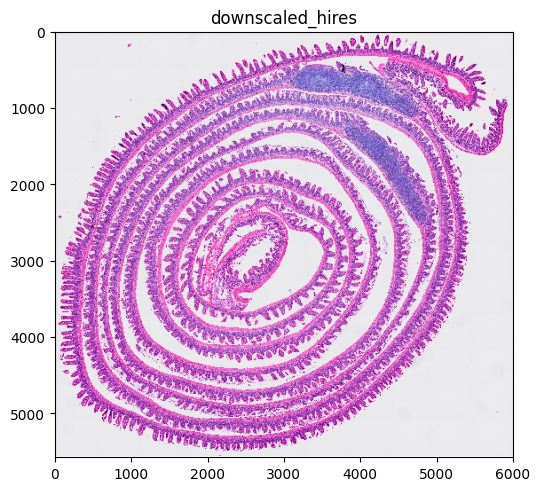

In [45]:
sdata_visium_hd.pl.render_images().pl.show("downscaled_hires")

In [50]:
# # Access the specific AnnData table
# adata_table3 = sdata_visium_hd.tables["square_008um"]  # Replace "table_name" with the actual table name

# # Make variable names unique
# adata_table3.var_names_make_unique()

# # Reassign the updated table back to the SpatialData object (optional if you need to reuse it)
# sdata_visium_hd.tables["square_008um"] = adata_table3

/Users/georgegavriilidis/spatialdata_env/lib/python3.9/site-packages/spatialdata/_core/_elements.py:116: UserWarning: Key `square_008um` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


In [52]:
sdata_visium_hd_crop = sdata_visium_hd.query.bounding_box(
    axes=["x", "y"],
    min_coordinate=[4500, 0],
    max_coordinate=[6000, 1500],
    target_coordinate_system="downscaled_hires",
)

/Users/georgegavriilidis/spatialdata_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [57]:
for table_name, adata in sdata_visium_hd_crop.tables.items():
    print(f"Processing table: {table_name}")
    adata.var_names_make_unique()

Processing table: square_002um
Processing table: square_008um
Processing table: square_016um


In [58]:
for table_name, adata in sdata_visium_hd_crop.tables.items():
    duplicates = adata.var.index[adata.var.index.duplicated()]
    if duplicates.empty:
        print(f"All variable names are unique in {table_name}.")
    else:
        print(f"Duplicate variable names still exist in {table_name}: {duplicates}")

All variable names are unique in square_002um.
All variable names are unique in square_008um.
All variable names are unique in square_016um.


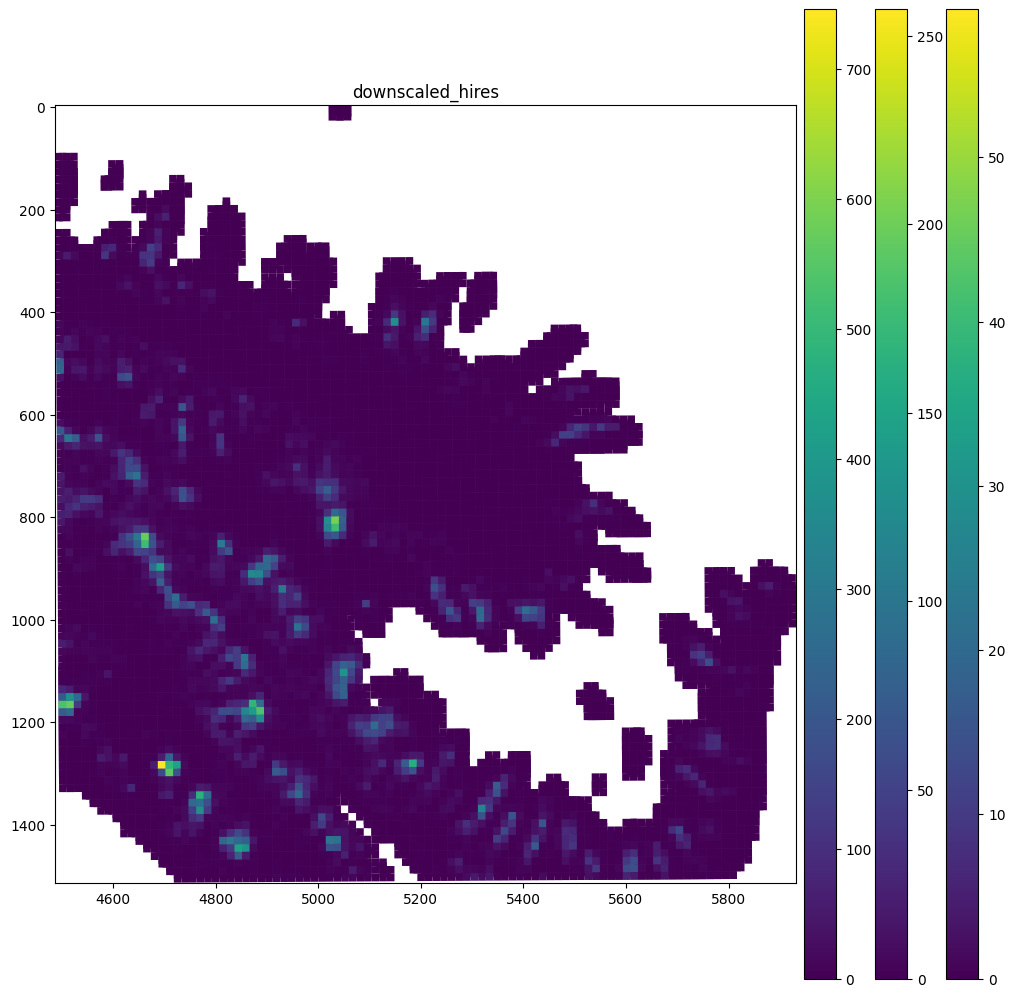

In [59]:
sdata_visium_hd_crop.pl.render_shapes(color="Igha", method="matplotlib").pl.show(
    "downscaled_hires", figsize=(10, 10)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.16513762..1.0].


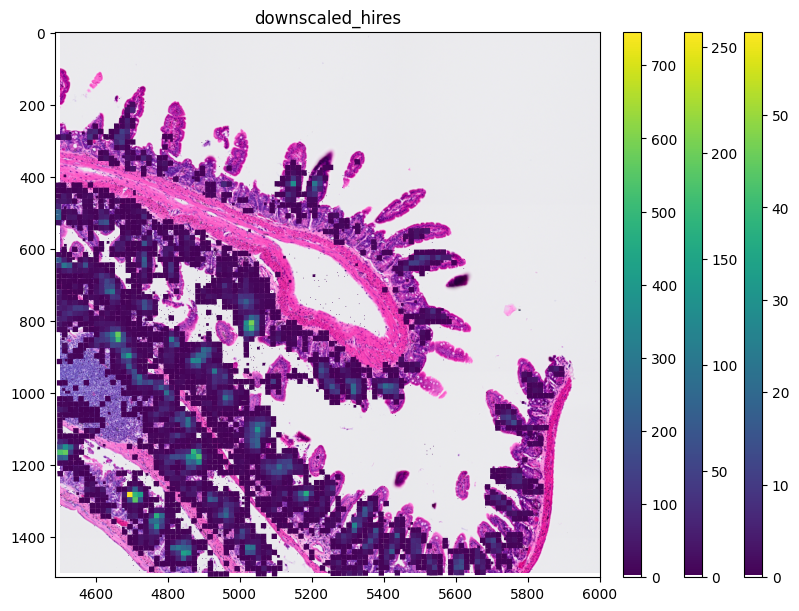

In [60]:
from spatialdata_plot.pl.utils import set_zero_in_cmap_to_transparent

cmap = set_zero_in_cmap_to_transparent(plt.cm.viridis)
cmap

sdata_visium_hd_crop.pl.render_images().pl.render_shapes(
    color="Igha", method="matplotlib", cmap=cmap
).pl.show("downscaled_hires", figsize=(8, 6))

## The `geopandas.GeoDataFrame` class (*shapes*)
A [`GeoDataFrame`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html) is an object that inherits from a `pandas.DataFrame`, and as such it supports the APIs that `pandas` provides, but also new powerful APIs for geometric manipulation.

The `geometry` column is what contains the spatial information.

In `spatialdata`, we support only dataframes where all the geometries are polygons/multipolygons, either where all the geometries are `shapely.Point` and a column called `radius` is present.

One can add new regular columns to the dataframe.

Let's approximates these polygons with circles of equal area to show an example of a collection of circles. Here we could use the `spatialdata.to_circle()` API, but let's use `geopandas` for the sake of showcasing some of its APIs.

In [61]:
gdf = sdata_visium["CytAssist_FFPE_Protein_Expression_Human_Glioblastoma"]
gdf

geometry     radius
spot_id                                
0        POINT (23137 10049)  92.296927
1         POINT (4001 22158)  92.296927
2         POINT (21933 3952)  92.296927
3         POINT (6675 10125)  92.296927
4           POINT (880 5188)  92.296927
...                      ...        ...
5751      POINT (15985 6471)  92.296927
5752      POINT (11283 2310)  92.296927
5753       POINT (8432 5829)  92.296927
5754     POINT (14838 17941)  92.296927
5755     POINT (11932 18800)  92.296927

[5756 rows x 2 columns]

<div style="border: 1px solid #ffa6a6; padding: 10px; border-radius: 5px;">
<span style="color: #ff6666; font-size: 20px;"><b>Reflection Point:</b></span> <span style="font-size: 20px;">Why Utilize GeoPandas?</span>  
<ul>
    <li>How does GeoPandas enhance spatial data analysis?</li>
    <li>What advantages does it offer in handling geospatial data compared to standard pandas?</li>
    <li>Consider its integration with other spatial libraries for advanced visualization and analysis.</li>
</ul>
<p>Reflect on the following:</p>
<ol>
    <li>What specific features of GeoPandas are most relevant to your dataset?</li>
    <li>How might GeoPandas streamline tasks like mapping coordinates or analyzing spatial relationships?</li>
    <li>What additional tools or libraries could complement GeoPandas in your workflow?</li>
</ol>
</div>

In [10]:
from IPython.display import display, HTML

# Define the reflection question with green styling
reflection_question = """
<div style="border: 1px solid #90ee90; padding: 10px; border-radius: 5px;">
<span style="color: #32cd32; font-size: 16px;"><b>Geopandas in SpatialData:</b></span>
</div>
"""

# Define the hidden answer with collapsible content
hidden_answer = """
<details>
<summary>Click to reveal the answer</summary>
<p>
Spatial Coordinates and Spot Radius: The geometry column contains the spatial positions of transcriptomic spots on the tissue, while the radius defines the size of each circular spot, enabling accurate visualization and mapping.

Integration with Gene Expression: The geospatial data links each spot to its corresponding gene expression profile, facilitating spatially resolved analysis of molecular data across the tissue.

Applications in Spatial Analysis: Geospatial relationships, such as clustering and distance between spots, can reveal tissue heterogeneity, cellular localization, and interactions within the tissue microenvironment.
</p>
</details>
"""

# Display the reflection question with hidden answer
display(HTML(reflection_question + hidden_answer))

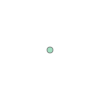

In [64]:
gdf.geometry.iloc[3]

## Futher reading
As mentioned before, we invite the readers to become familiar with the geospatial Python data structures that we use in the `spatialdata` library.
In the next tutorials we will explore various functions enabled by the `spatialdata` framework; anyway for a deeper introduction we kindly point you to the [notebooks section](https://spatialdata.scverse.org/en/latest/tutorials/notebooks/notebooks.html) of the documentation, and in particular to the following notebooks, which explain in detail how to create `SpatialData` objects from screatch and manipulate them:

- [In depth introduction to `SpatialData` objects](https://spatialdata.scverse.org/en/latest/tutorials/notebooks/notebooks/examples/models1.html).
- [In depth introduction to spatial elements and models (`.parse()`, `.validate()`)](https://spatialdata.scverse.org/en/latest/tutorials/notebooks/notebooks/examples/models2.html).
- [Annotating elements and manipulating annotations](https://spatialdata.scverse.org/en/latest/tutorials/notebooks/notebooks/examples/tables.html).

Furthermore, you can find curated code examples by checking the various [readers available in the `spatialdata-io` library](https://github.com/scverse/spatialdata-io/tree/main/src/spatialdata_io/readers).

Finally, for a deeper description of all the available functions, please consult the [API documentation](https://spatialdata.scverse.org/en/latest/api.html).